<a href="https://colab.research.google.com/github/samveddubey/DogsVsCats_TransferLearning/blob/main/DogVsCat_TransferLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle


In [2]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle competitions download -c dogs-vs-cats-imint-2020

 97% 529M/546M [00:06<00:00, 124MB/s]
100% 546M/546M [00:06<00:00, 84.4MB/s]


In [4]:
!ls

dogs-vs-cats-imint-2020.zip  kaggle.json  sample_data


In [5]:
# extracting the compressed dataset
from zipfile import ZipFile

dataset = '/content/dogs-vs-cats-imint-2020.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [6]:
import os
# counting the number of files in train folder
path, dirs, files = next(os.walk('/content/dogs-vs-cats-imint-2020/cats_vs_dogs'))
file_count = len(files)
print('Number of images: ', file_count)

Number of images:  18752


In [7]:
file_names=os.listdir('/content/dogs-vs-cats-imint-2020/cats_vs_dogs')
print(file_names)

['dog.11507.jpg', 'dog.584.jpg', 'cat.788.jpg', 'cat.399.jpg', 'dog.3908.jpg', 'cat.9722.jpg', 'dog.7266.jpg', 'cat.369.jpg', 'dog.7989.jpg', 'cat.767.jpg', 'cat.3349.jpg', 'cat.8333.jpg', 'dog.6908.jpg', 'dog.10880.jpg', 'dog.6336.jpg', 'dog.3517.jpg', 'dog.8610.jpg', 'cat.6262.jpg', 'dog.11805.jpg', 'dog.1510.jpg', 'dog.3295.jpg', 'cat.935.jpg', 'dog.4623.jpg', 'cat.5849.jpg', 'cat.4982.jpg', 'dog.6106.jpg', 'dog.6616.jpg', 'cat.10667.jpg', 'dog.8152.jpg', 'cat.6878.jpg', 'cat.10574.jpg', 'cat.4782.jpg', 'cat.4266.jpg', 'cat.6485.jpg', 'dog.5307.jpg', 'dog.11943.jpg', 'cat.7956.jpg', 'dog.10519.jpg', 'cat.8544.jpg', 'cat.834.jpg', 'cat.8932.jpg', 'dog.5883.jpg', 'dog.2123.jpg', 'dog.8217.jpg', 'dog.9919.jpg', 'dog.2338.jpg', 'dog.6176.jpg', 'cat.8922.jpg', 'cat.7836.jpg', 'cat.8444.jpg', 'cat.601.jpg', 'dog.384.jpg', 'dog.2582.jpg', 'dog.7648.jpg', 'cat.2658.jpg', 'cat.9950.jpg', 'cat.1833.jpg', 'cat.6323.jpg', 'cat.10970.jpg', 'cat.11187.jpg', 'cat.3154.jpg', 'dog.3678.jpg', 'cat.14

In [8]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

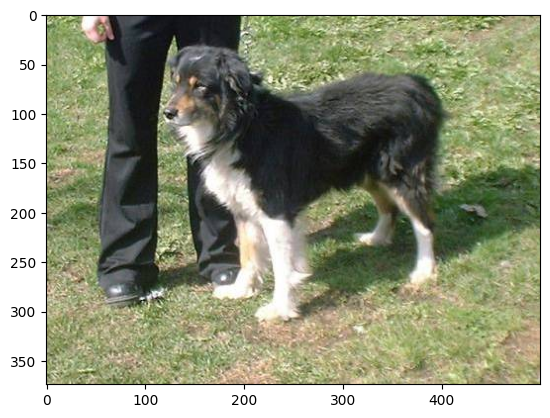

In [11]:
#display dog images
img=mpimg.imread('/content/dogs-vs-cats-imint-2020/cats_vs_dogs/dog.3908.jpg')
imgdog=plt.imshow(img)
imgdog

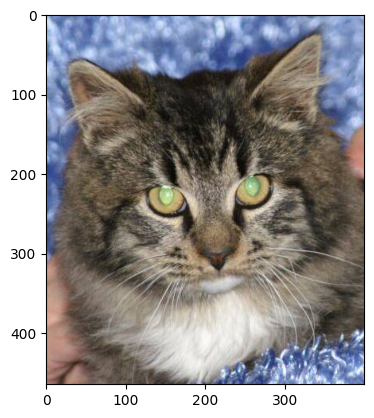

In [12]:
#display dog images
img=mpimg.imread('/content/dogs-vs-cats-imint-2020/cats_vs_dogs/cat.9722.jpg')
imgcat=plt.imshow(img)
imgcat

1. Resize the images to a common pixel value= same size
2. (optional) convert the images to grayscale to save time in training

In [13]:
filenames=os.listdir('/content/dogs-vs-cats-imint-2020/cats_vs_dogs')


for i in range(5):
  name=filenames[i]
  print(name[0:3])


dog
dog
cat
cat
dog


In [16]:
dog_count=0
cat_count=0


for imgfile in filenames:
  name=imgfile[0:3]

  if name=='cat':
    cat_count+=1

  else:
    dog_count+=1

print('number of dog images:', dog_count)
print('number of cat images:', cat_count)

number of dog images: 9376
number of cat images: 9376


Resizing Images

In [17]:
#make a directory for the newly resized images
os.mkdir('/content/resized images')

In [21]:
original_dir='/content/dogs-vs-cats-imint-2020/cats_vs_dogs/'
resized_dir='/content/resized images/'

for i in range(2000):
  filename_=os.listdir(original_dir)[i]
  imgpath=original_dir+filename_
  img=Image.open(imgpath)
  img=img.resize((224,224))
  img=img.convert('RGB')
  newimgpath=resized_dir+filename_
  img.save(newimgpath)

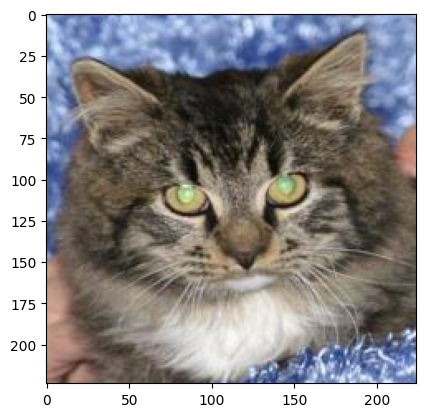

In [22]:
# display resized cat image
img = mpimg.imread('/content/resized images/cat.9722.jpg')
imgplt = plt.imshow(img)
plt.show()

Create labels


In [23]:
# creaing a for loop to assign labels
filenames = os.listdir('/content/resized images/')


labels = []

for i in range(2000):

  file_name = filenames[i]
  label = file_name[0:3]

  if label == 'dog':
    labels.append(1)

  else:
    labels.append(0)

In [24]:
print(filenames[0:5])
print(len(filenames))

['dog.11507.jpg', 'dog.584.jpg', 'cat.788.jpg', 'cat.399.jpg', 'dog.3908.jpg']
2000


In [25]:
print(labels[0:5])
print(len(labels))

[1, 1, 0, 0, 1]
2000


In [26]:
# counting the images of dogs and cats out of 2000 images
values, counts = np.unique(labels, return_counts=True)
print(values)
print(counts)

[0 1]
[ 999 1001]


Converting all the resized images to numpy arrays

In [27]:
import cv2
import glob


In [31]:
image_dir='/content/resized images/'
image_extension=['png','jpg']
files=[]
[files.extend(glob.glob(image_dir + '*.' + e)) for e in image_extension]
dog_cat_imgs=np.asarray([cv2.imread(file) for file in files])

In [32]:
print(dog_cat_imgs)

[[[[ 35  34  36]
   [ 35  34  36]
   [ 35  34  36]
   ...
   [  9  11   5]
   [ 10  12   6]
   [ 10  13   4]]

  [[ 35  34  36]
   [ 35  34  36]
   [ 36  35  37]
   ...
   [ 13  15   9]
   [ 13  15   9]
   [ 13  16   7]]

  [[ 36  35  37]
   [ 36  35  37]
   [ 36  35  37]
   ...
   [ 14  16  10]
   [ 14  16  10]
   [ 14  17   8]]

  ...

  [[ 14  15  29]
   [ 13  14  28]
   [ 12  13  27]
   ...
   [ 33  54  92]
   [ 34  53  91]
   [ 30  49  87]]

  [[ 15  16  30]
   [ 14  15  29]
   [ 14  15  29]
   ...
   [ 34  55  93]
   [ 35  54  92]
   [ 29  48  86]]

  [[ 15  16  30]
   [ 15  16  30]
   [ 15  16  30]
   ...
   [ 30  51  89]
   [ 30  49  87]
   [ 23  42  80]]]


 [[[ 85  84  86]
   [ 96  95  97]
   [100  99 103]
   ...
   [106 119 135]
   [106 119 135]
   [106 119 135]]

  [[ 63  62  66]
   [ 81  82  86]
   [ 98  96 102]
   ...
   [109 122 138]
   [110 123 139]
   [111 124 140]]

  [[ 27  27  33]
   [ 55  58  63]
   [ 86  85  94]
   ...
   [112 125 141]
   [114 127 143]
   [115 128

In [33]:
print(dog_cat_imgs.shape)

(2000, 224, 224, 3)


In [34]:
X=dog_cat_imgs
Y=np.asarray(labels)

**Train Test Split**

In [35]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [36]:
print(X.shape, X_train.shape)

(2000, 224, 224, 3) (1600, 224, 224, 3)


In [37]:
#scaling the data ---- variation in data values
X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [38]:
print(X_train_scaled)

[[[[0.         0.19215686 0.5372549 ]
   [0.         0.19215686 0.5372549 ]
   [0.         0.19215686 0.54509804]
   ...
   [0.         0.07843137 0.40784314]
   [0.         0.07058824 0.40392157]
   [0.         0.07058824 0.40392157]]

  [[0.00392157 0.20784314 0.56078431]
   [0.00392157 0.20784314 0.56078431]
   [0.00392157 0.20784314 0.56078431]
   ...
   [0.         0.0745098  0.39607843]
   [0.         0.0745098  0.39607843]
   [0.         0.07058824 0.39215686]]

  [[0.02352941 0.23137255 0.58823529]
   [0.01568627 0.23137255 0.58823529]
   [0.01568627 0.23137255 0.58823529]
   ...
   [0.         0.0745098  0.39215686]
   [0.         0.07058824 0.38823529]
   [0.         0.07058824 0.38823529]]

  ...

  [[0.11764706 0.23921569 0.29803922]
   [0.12156863 0.24313725 0.30196078]
   [0.1254902  0.25098039 0.30196078]
   ...
   [0.09019608 0.19607843 0.2745098 ]
   [0.09803922 0.20392157 0.28235294]
   [0.10588235 0.21176471 0.29019608]]

  [[0.13333333 0.24705882 0.30588235]
   [0.1

In [39]:
import tensorflow as tf
import tensorflow_hub as hub

mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=(224,224,3), trainable=False)
num_of_classes = 2

model = tf.keras.Sequential([

    pretrained_model,
    tf.keras.layers.Dense(num_of_classes)

])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 2260546 (8.62 MB)
Trainable params: 2562 (10.01 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [40]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['acc']
)


In [41]:
model.fit(X_train_scaled, Y_train, epochs=5)

Epoch 1/5
50/50 [==============================] - 68s 1s/step - loss: 0.2313 - acc: 0.9025
Epoch 2/5
50/50 [==============================] - 51s 1s/step - loss: 0.0920 - acc: 0.9669
Epoch 3/5
50/50 [==============================] - 52s 1s/step - loss: 0.0710 - acc: 0.9762
Epoch 4/5
50/50 [==============================] - 49s 981ms/step - loss: 0.0594 - acc: 0.9812
Epoch 5/5
50/50 [==============================] - 45s 900ms/step - loss: 0.0483 - acc: 0.9856


In [42]:
score, acc = model.evaluate(X_test_scaled, Y_test)
print('Test Loss =', score)
print('Test Accuracy =', acc)

13/13 [==============================] - 13s 931ms/step - loss: 0.0579 - acc: 0.9800
Test Loss = 0.05787641927599907
Test Accuracy = 0.9800000190734863


Path of the image to be predicted: /content/dogs-vs-cats-imint-2020/test/0.jpg


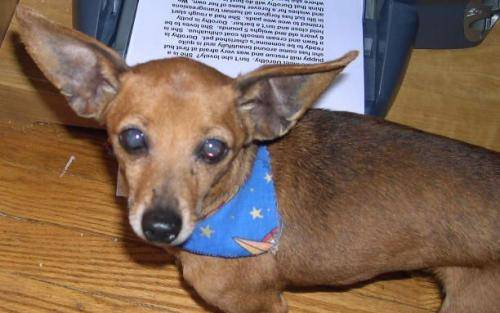

1/1 [==============================] - 1s 532ms/step
[[-2.1750288  2.925976 ]]
1
The image represents a Dog


In [45]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
  print('The image represents a Cat')

else:
  print('The image represents a Dog')